In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
import numpy as np
import scipy.stats as stats

pd.set_option('future.no_silent_downcasting', True)

# Import Data

In [2]:
df = pd.read_csv('data/Customer-Hybrid.csv', index_col=0)
df.head()

,Exited,gender,age,term_deposit,Own_car,Own_property,Geography,credit_score,tenure,balance,...,Account_length,Total_income,credit_card,Years_employed,Income_type,Education_type,Family_status,Housing_type,Occupation_type,Target
ID,,,,,,,,,,,,,,,,,,,,,
5008804,1,Female,42,0,1,1,Greece,619,2,0.00,...,15,427500.0,1,12.435574,Working,Higher education,Civil marriage,Rented apartment,Other,1
5008806,0,Female,41,0,1,1,Spain,608,1,83807.86,...,29,112500.0,0,3.104787,Working,Secondary / secondary special,Married,House / apartment,Security staff,0
5008808,1,Female,42,0,0,1,Greece,502,8,159660.80,...,4,270000.0,1,8.353354,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,Sales staff,0
5008812,0,Female,39,0,0,1,Greece,699,1,0.00,...,20,283500.0,0,0.000000,Pensioner,Higher education,Separated,House / apartment,Other,0
5008815,0,Female,43,0,1,1,Spain,850,2,125510.82,...,5,270000.0,1,2.105450,Working,Higher education,Married,House / apartment,Accountants,0


# Check for missing data

In [3]:
df.isnull().sum()

Exited             0
gender             0
age                0
term_deposit       0
Own_car            0
Own_property       0
Geography          0
credit_score       0
tenure             0
balance            0
Unemployed         0
Num_children       0
Account_length     0
Total_income       0
credit_card        0
Years_employed     0
Income_type        0
Education_type     0
Family_status      0
Housing_type       0
Occupation_type    0
Target             0
dtype: int64

# Check data types

In [4]:
bool_cols = []
cont_cols = []
cat_cols = [col for col in df.columns if df[col].dtype=='object']

for col in df.columns:
    if ((df[col].dtype=="object") or (len(df[col].unique())<5)):
        if (df[col].dtype!="object"):
            bool_cols.append(col)
    else:
        cont_cols.append(col)

print(f"Categorical Columns: {cat_cols}")
print(f"Continuous Columns: {cont_cols}")
print(f"Boolean Columns: {bool_cols}")

for col in df.columns:
    if (col not in cat_cols) and (col not in cont_cols) and (col not in bool_cols):
        print(f"Unfiled Columns: {col}")

Categorical Columns: ['gender', 'Geography', 'Income_type', 'Education_type', 'Family_status', 'Housing_type', 'Occupation_type']
Continuous Columns: ['age', 'credit_score', 'tenure', 'balance', 'Num_children', 'Account_length', 'Total_income', 'Years_employed']
Boolean Columns: ['Exited', 'term_deposit', 'Own_car', 'Own_property', 'Unemployed', 'credit_card', 'Target']


# Check for number of items per category in categorical columns

In [5]:
for col in cat_cols:
    print(f"\nColumn name: {col}")
    print(df[col].value_counts())


Column name: gender
gender
Male      5283
Female    4426
Name: count, dtype: int64

Column name: Geography
Geography
Greece         4870
Netherlands    2429
Spain          2410
Name: count, dtype: int64

Column name: Income_type
Income_type
Working                 4960
Commercial associate    2312
Pensioner               1712
State servant            722
Student                    3
Name: count, dtype: int64

Column name: Education_type
Education_type
Secondary / secondary special    6761
Higher education                 2457
Incomplete higher                 371
Lower secondary                   114
Academic degree                     6
Name: count, dtype: int64

Column name: Family_status
Family_status
Married                 6530
Single / not married    1359
Civil marriage           836
Separated                574
Widow                    410
Name: count, dtype: int64

Column name: Housing_type
Housing_type
House / apartment      8684
With parents            448
Municipal apartmen

### Combining Categories
As some categories have such low numbers of records in, some categories will be combined.

In [6]:
# combine pensioner and student - both are lower income
df['Income_type'] = df['Income_type'].replace(
    {'Pensioner': 'Pensioner or Student', 'Student': 'Pensioner or Student'}
)

# combine various education levels
df['Education_type'] = df['Education_type'].replace(
    {'Secondary / secondary special': 'Some Secondary/Secondary special',
     'Higher education': 'Some Higher Education',
     'Incomplete higher': 'Some Higher Education',
     'Lower secondary': 'Some Secondary/Secondary special',
     'Academic degree': 'Some Higher Education'
    }
)

# combine housing types
df['Housing_type'] = df['Housing_type'].replace(
    {'House / apartment': 'House/Apartment',
     'Municipal apartment': 'Rented or Social Housing',
     'Rented apartment': 'Rented or Social Housing',
     'Office apartment': 'Rented or Social Housing',
     'Co-op apartment': 'Rented or Social Housing',     
    }
)

# combine occupation types
low_skill = ['Laborers', 'Low-skill Laborers', 'Sales staff', 'Cleaning staff', 
             'Private service staff', 'Cooking staff', 'Waiters/barmen staff', 
             'Security staff', 'Secretaries', 'Drivers']
high_skill = ['Core staff', 'Managers', 'Accountants', 'High skill tech staff', 
              'Medicine staff', 'IT staff', 'HR staff', 'Realty agents']

df['Occupation_type'] = df['Occupation_type'].replace(low_skill, 'Low-skill')
df['Occupation_type'] = df['Occupation_type'].replace(high_skill, 'High-skill')

for col in cat_cols:
    print(f"\nColumn name: {col}")
    print(df[col].value_counts())


Column name: gender
gender
Male      5283
Female    4426
Name: count, dtype: int64

Column name: Geography
Geography
Greece         4870
Netherlands    2429
Spain          2410
Name: count, dtype: int64

Column name: Income_type
Income_type
Working                 4960
Commercial associate    2312
Pensioner or Student    1715
State servant            722
Name: count, dtype: int64

Column name: Education_type
Education_type
Some Secondary/Secondary special    6875
Some Higher Education               2834
Name: count, dtype: int64

Column name: Family_status
Family_status
Married                 6530
Single / not married    1359
Civil marriage           836
Separated                574
Widow                    410
Name: count, dtype: int64

Column name: Housing_type
Housing_type
House/Apartment             8684
Rented or Social Housing     577
With parents                 448
Name: count, dtype: int64

Column name: Occupation_type
Occupation_type
Low-skill     4052
Other         2994
Hi

In [7]:
# save df before encoding
df.to_csv('data/df_combo.csv', index=True)

# Encoding Categorical Data

In [8]:
cat_cols.remove('gender')
cat_cols.remove('Education_type')

# One-hot encoding and label encoding
df = pd.get_dummies(df, columns=cat_cols)
df['gender'] = df['gender'].replace({'Male': 0, 'Female': 1})
df['Education_type'] = df['Education_type'].replace({'Some Secondary/Secondary special': 0, 'Some Higher Education': 1})
df.head()

,Exited,gender,age,term_deposit,Own_car,Own_property,credit_score,tenure,balance,Unemployed,...,Family_status_Married,Family_status_Separated,Family_status_Single / not married,Family_status_Widow,Housing_type_House/Apartment,Housing_type_Rented or Social Housing,Housing_type_With parents,Occupation_type_High-skill,Occupation_type_Low-skill,Occupation_type_Other
ID,,,,,,,,,,,,,,,,,,,,,
5008804,1,1,42,0,1,1,619,2,0.00,0,...,False,False,False,False,False,True,False,False,False,True
5008806,0,1,41,0,1,1,608,1,83807.86,0,...,True,False,False,False,True,False,False,False,True,False
5008808,1,1,42,0,0,1,502,8,159660.80,0,...,False,False,True,False,True,False,False,False,True,False
5008812,0,1,39,0,0,1,699,1,0.00,1,...,False,True,False,False,True,False,False,False,False,True
5008815,0,1,43,0,1,1,850,2,125510.82,0,...,True,False,False,False,True,False,False,True,False,False


# Outliers

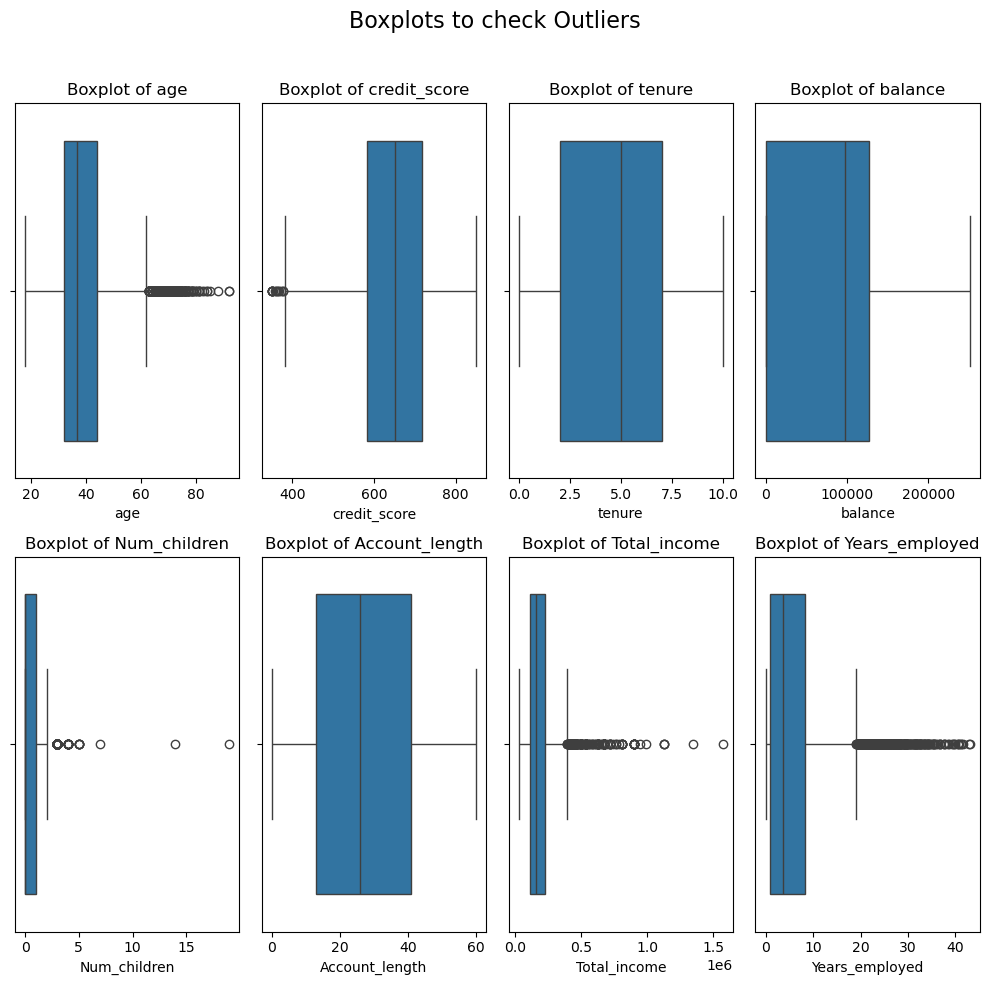

In [9]:
# Create a figure and a set of subplots
fig, axes = plt.subplots(2, 4, figsize=(10, 10))
axes = axes.flatten()

# Plot each numerical column in a separate subplot
for i, col in enumerate(cont_cols):
    sns.boxplot(x=df[col], ax=axes[i])
    axes[i].set_title(f'Boxplot of {col}')

# Add a main title
fig.suptitle('Boxplots to check Outliers', fontsize=16)

# Adjust layout
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

In [10]:
df['Num_children'].sort_values(ascending=False).head(25)

ID
5105054    19
5061207    14
5118330     7
5034001     5
5096613     5
5105605     5
5139442     5
5135534     5
5117141     4
5116259     4
5142765     4
5142863     4
5061214     4
5021500     4
5066646     4
5079302     4
5069220     4
5100436     4
5053508     4
5028252     4
5095217     4
5137518     4
5111167     4
5145770     4
5067124     4
Name: Num_children, dtype: int64

In [11]:
df['Num_children'].value_counts()

Num_children
0     6819
1     1886
2      852
3      126
4       18
5        5
14       1
19       1
7        1
Name: count, dtype: int64

### Winsorising/capping Num_children

In [12]:
df['Num_children'] = df['Num_children'].clip(upper=4)
df['Num_children'].value_counts()

Num_children
0    6819
1    1886
2     852
3     126
4      26
Name: count, dtype: int64

### Trying Double Mad for skewed variables

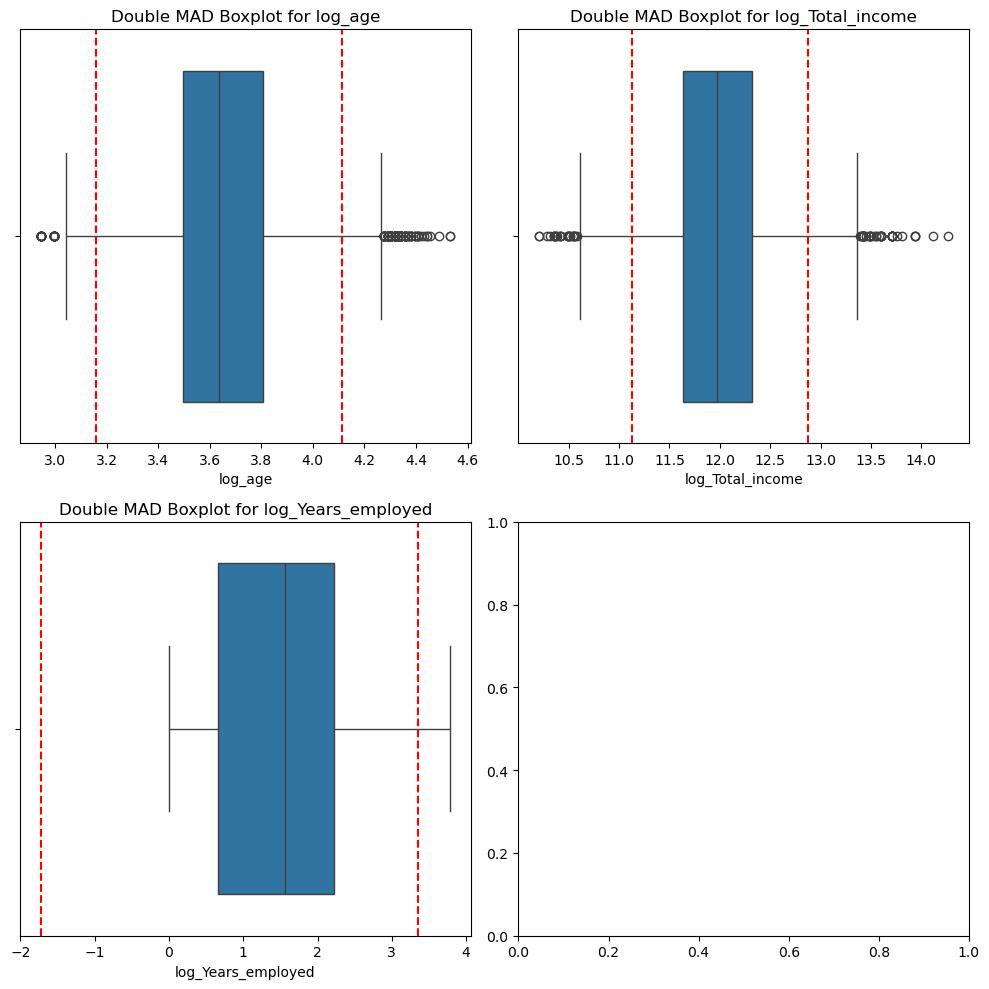

In [13]:
# attempting double madness!
long_tails = ['age', 'Total_income', 'Years_employed']
log_cols = []

# log transform the long tails to make them more symmetrical 
for col in long_tails:
    df[f'log_{col}'] = np.log(df[col] + 1)  # Add 1 to avoid log(0)
    log_cols.append(f'log_{col}')

def double_mad(data):
    # Calculate the median
    median = np.median(data)
    
    # Split the data into two parts
    lower_data = data[data <= median]
    upper_data = data[data >= median]
    
    # Compute MAD for lower and upper parts
    mad_lower = np.median(np.abs(lower_data - np.median(lower_data)))
    mad_upper = np.median(np.abs(upper_data - np.median(upper_data)))
    
    return mad_lower, mad_upper, median

def double_mad_boxplot(data, column, ax, k=3):
    # Compute double MAD
    mad_lower, mad_upper, median = double_mad(data[column])
    
    # Calculate bounds for outliers
    lower_bound = median - k * mad_lower
    upper_bound = median + k * mad_upper
    
    # Plot boxplot
    sns.boxplot(x=data[column], ax=ax)
    
    # Overlay the double MAD bounds as vertical lines
    ax.axvline(lower_bound, color='r', linestyle='--', label=f'Lower bound ({k}×MAD)')
    ax.axvline(upper_bound, color='r', linestyle='--', label=f'Upper bound ({k}×MAD)')
    ax.set_title(f'Double MAD Boxplot for {column}')
    
    return lower_bound, upper_bound

fig, axes = plt.subplots(2, 2, figsize=(10, 10))
axes = axes.flatten()

for i, col in enumerate(log_cols):
    double_mad_boxplot(df, col, axes[i], k=5)

plt.tight_layout()
plt.show()

# Examining Skewed Data

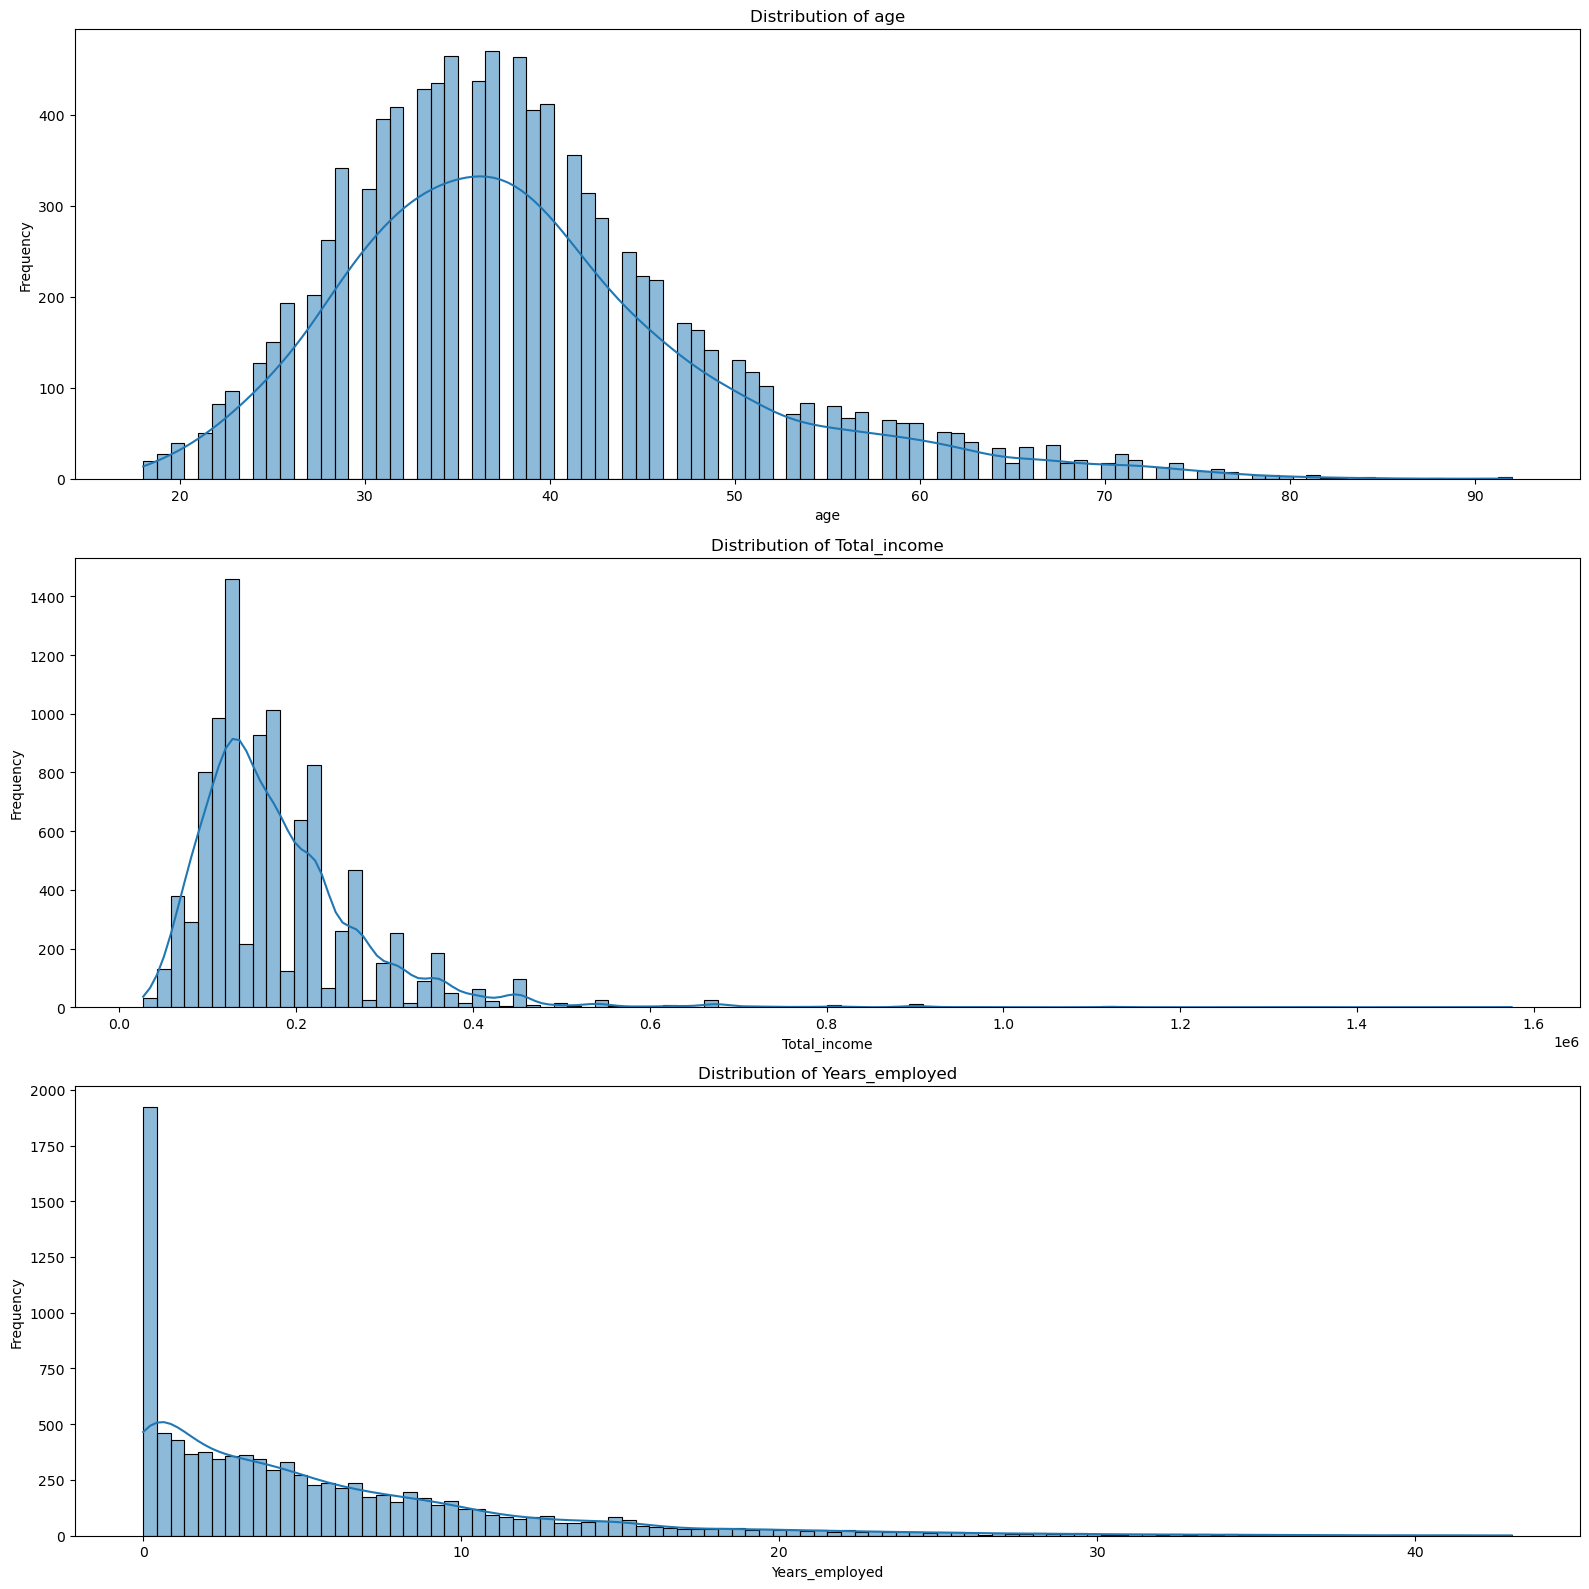

In [14]:
un_log_cols = ['age', 'Total_income', 'Years_employed']

fig, axes = plt.subplots(3, 1, figsize=(16, 16))
axes = axes.flatten()

# Plot each feature in the grid
for i, col in enumerate(un_log_cols):
    sns.histplot(df[col], kde=True, bins=100, ax=axes[i])
    axes[i].set_title(f'Distribution of {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frequency')

# Adjust layout
plt.tight_layout()
plt.show()

In [15]:
for col in un_log_cols:
    skewness = stats.skew(df[col])
    kurt = stats.kurtosis(df[col])
    print(f"{col}: Skewness = {skewness:.2f}, Kurtosis = {kurt:.2f}")

age: Skewness = 1.01, Kurtosis = 1.38
Total_income: Skewness = 2.66, Kurtosis = 15.77
Years_employed: Skewness = 1.84, Kurtosis = 4.22


Age: Moderately right-skewed. Slightly heavy-tailed.

Total_income: Heavily right-skewed. Very heavy-tailed.

Years_employed: Significant right-skew. Moderately heavy-tailed.

# Log transforming very skewed data

In [16]:
for col in long_tails:
    df[f'log_{col}'] = np.log(df[col] + 1)  # Add 1 to avoid log(0)
df[['age', 'log_age', 'Years_employed', 'log_Years_employed', 'Total_income', 'log_Total_income']].describe()

,age,log_age,Years_employed,log_Years_employed,Total_income,log_Total_income
count,9709.000000,9709.000000,9709.000000,9709.000000,9.709000e+03,9709.000000
mean,38.936348,3.655049,5.664730,1.462110,1.812282e+05,11.987678
std,10.495229,0.251695,6.342241,0.972343,9.927731e+04,0.483651
min,18.000000,2.944439,0.000000,0.000000,2.700000e+04,10.203629
25%,32.000000,3.496508,0.928150,0.656561,1.125000e+05,11.630717
50%,37.000000,3.637586,3.761884,1.560643,1.575000e+05,11.967187
75%,44.000000,3.806662,8.200031,2.219207,2.250000e+05,12.323860
max,92.000000,4.532599,43.020733,3.784661,1.575000e+06,14.269766


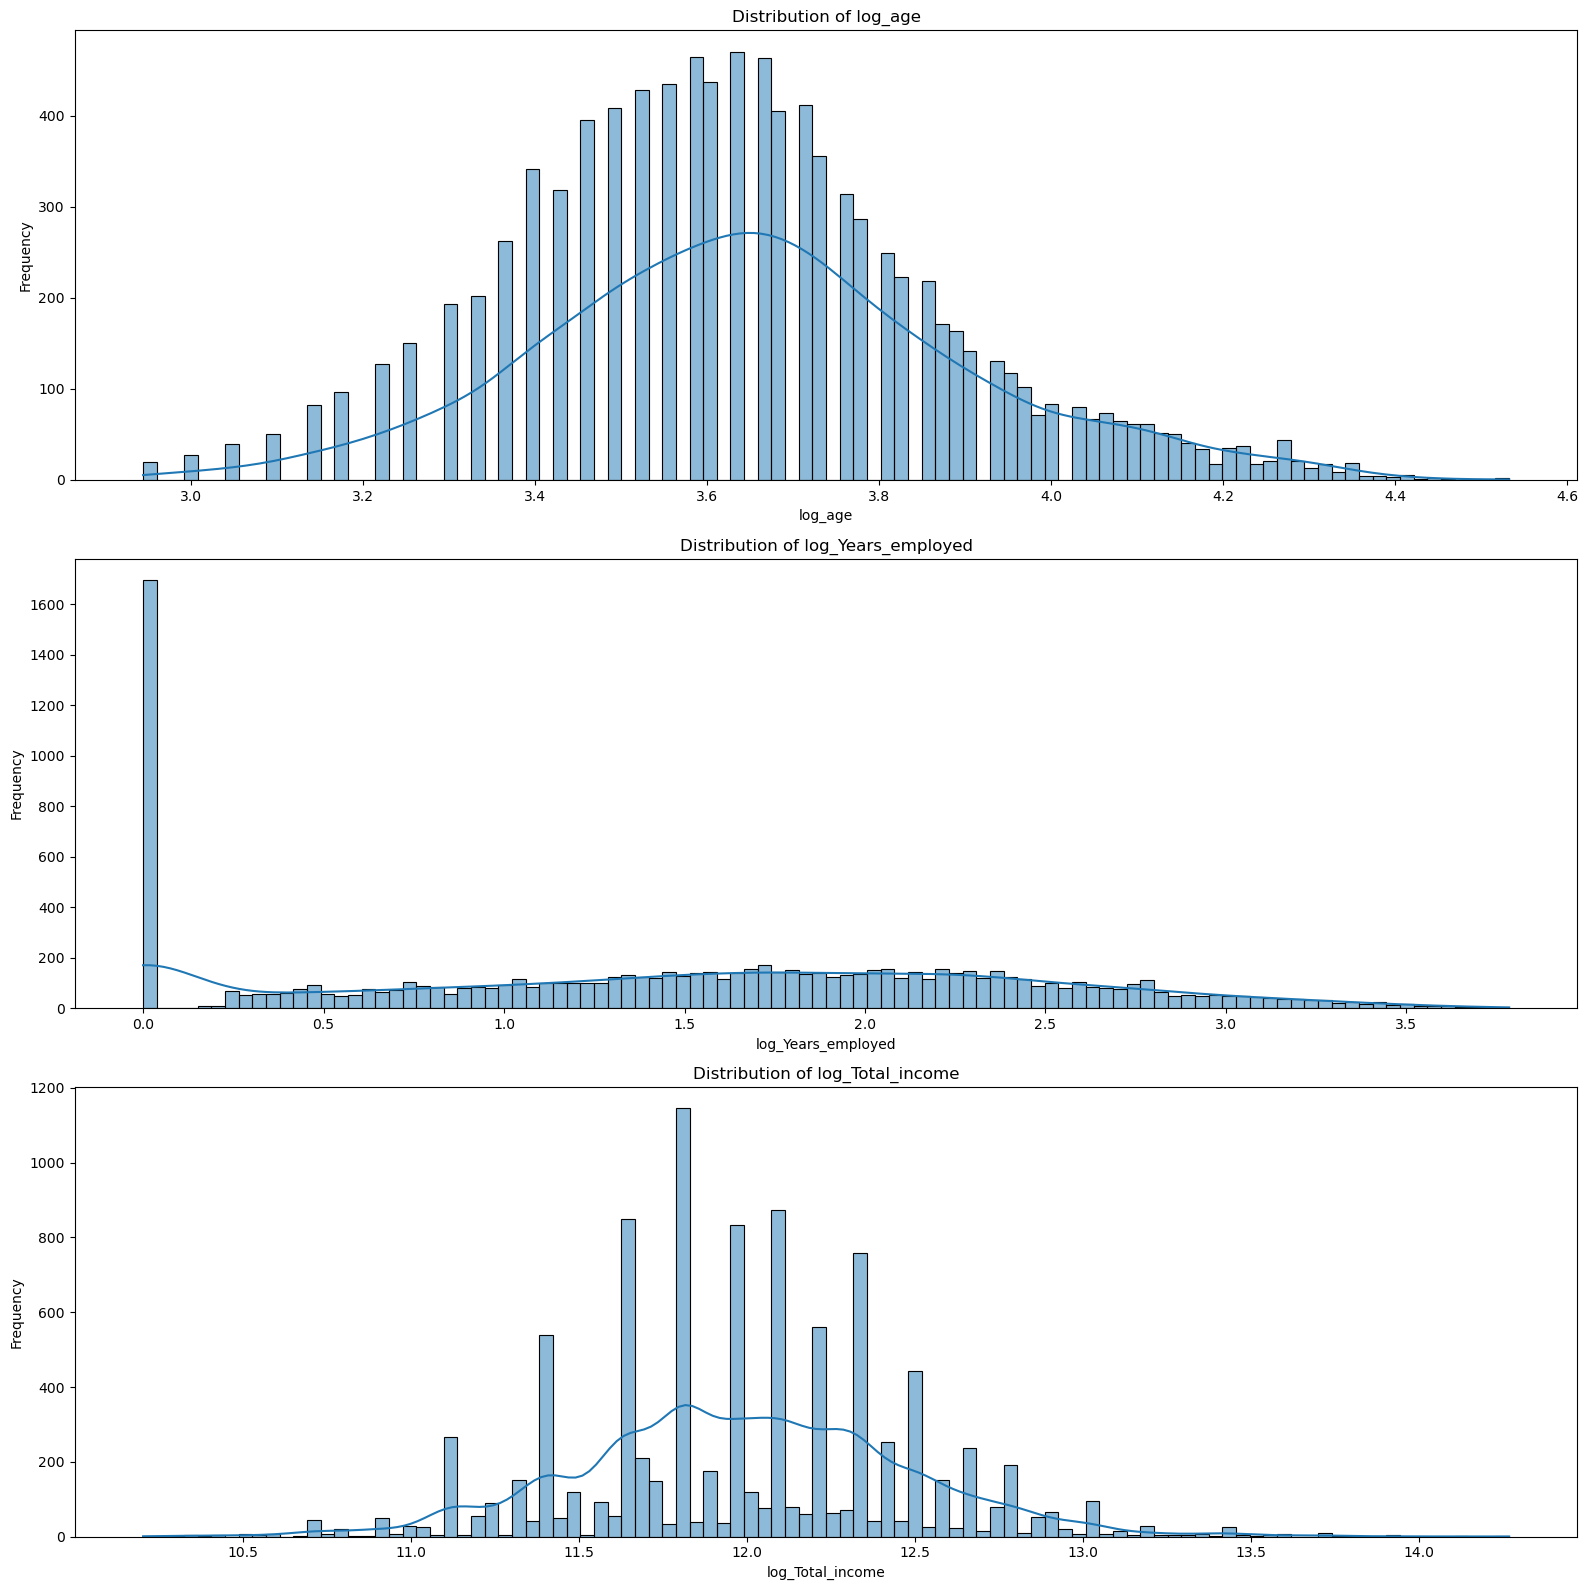

In [17]:
log_cols = ['log_age', 'log_Years_employed', 'log_Total_income']
fig, axes = plt.subplots(3, 1, figsize=(16, 16))
axes = axes.flatten()

# Plot each feature in the grid
for i, col in enumerate(log_cols):
    sns.histplot(df[col], kde=True, bins=100, ax=axes[i])
    axes[i].set_title(f'Distribution of {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frequency')

# Adjust layout
plt.tight_layout()
plt.show()

In [18]:
for col in log_cols:
    skewness = stats.skew(df[col])
    kurt = stats.kurtosis(df[col])
    print(f"{col}: Skewness = {skewness:.2f}, Kurtosis = {kurt:.2f}")

log_age: Skewness = 0.21, Kurtosis = 0.15
log_Years_employed: Skewness = -0.06, Kurtosis = -1.01
log_Total_income: Skewness = 0.09, Kurtosis = 0.45


# Standardise data

In [19]:
scaler = StandardScaler()

df_stand = df.copy(deep=True)
df_stand[cont_cols] = scaler.fit_transform(df_stand[cont_cols])

df_stand.head()

,Exited,gender,age,term_deposit,Own_car,Own_property,credit_score,tenure,balance,Unemployed,...,Family_status_Widow,Housing_type_House/Apartment,Housing_type_Rented or Social Housing,Housing_type_With parents,Occupation_type_High-skill,Occupation_type_Low-skill,Occupation_type_Other,log_age,log_Total_income,log_Years_employed
ID,,,,,,,,,,,,,,,,,,,,,
5008804,1,1,0.291924,0,1,1,-0.324265,-1.040811,-1.222766,0,...,False,False,True,False,False,False,True,3.761200,12.965712,2.597906
5008806,0,1,0.196638,0,1,1,-0.437972,-1.386822,0.120305,0,...,False,True,False,False,False,True,False,3.737670,11.630717,1.412154
5008808,1,1,0.291924,0,0,1,-1.533701,1.035252,1.335893,0,...,False,True,False,False,False,True,False,3.761200,12.506181,2.235735
5008812,0,1,0.006065,0,0,1,0.502700,-1.386822,-1.222766,1,...,False,True,False,False,False,False,True,3.688879,12.554971,0.000000
5008815,0,1,0.387210,0,1,1,2.063597,-1.040811,0.788620,0,...,False,True,False,False,True,False,False,3.784190,12.506181,1.133159


In [20]:
# save file
df_stand.to_csv('data/df_stand2.csv', index=True)